# 0. Chargement des données

In [2]:
# import networkx (and other useful packages)
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
ELfriendG = nx.read_edgelist('ELfriend_edgelist.txt',comments="node",create_using=nx.DiGraph(),nodetype=int)
ELcowork = nx.read_edgelist('ELcowork_edgelist.txt',comments="node",create_using=nx.Graph(),nodetype=int)
ELfriendG.name = "ELfriend"
ELcowork.name = "ELcowork"
print(nx.info(ELfriendG), '\n\n', nx.info(ELcowork),sep="")

Name: ELfriend
Type: DiGraph
Number of nodes: 69
Number of edges: 575
Average in degree:   8.3333
Average out degree:   8.3333

Name: ELcowork
Type: Graph
Number of nodes: 70
Number of edges: 378
Average degree:  10.8000


**Remarque** : Comme vu dans le CC1, il y a 69 nodes dans ELfriend (il manque les noeuds 44 et 47) et 70 dans ELcowork (il manque le noeud 8). On peut aussi le vérifier en chargeant les attributs (cf ci-dessous).
ELfriend est un graph orienté avec moins de relations que ELCowork, qui n'est pas orienté (pour comparer le nombre de "edges", il faut multiplier par deux ceux de ELcowork).

In [4]:
# match nodes of digraph with attributes of nodes
ELnodes = pd.read_csv("ELnodeAttributes.txt", sep='\t')
ELNodeData = ELnodes.set_index('Node').to_dict('index').items()
ELfriendG.add_nodes_from(ELNodeData)
ELcowork.add_nodes_from(ELNodeData)
ELfriendG_isolated = list(nx.isolates(ELfriendG))
ELcowork_isolated = list(nx.isolates(ELcowork))
print("Les noeuds isolés de ELfriend sont :", ELfriendG_isolated)
print("Le noeud isolés de ELcowork est :", ELcowork_isolated)

Les noeuds isolés de ELfriend sont : [44, 47]
Le noeud isolés de ELcowork est : [8]


Il y a maintenant bien 71 noeuds mais le nombre de degree diminue du fait de l'ajout des noeuds isolés.

In [5]:
print(nx.info(ELfriendG), '\n\n', nx.info(ELcowork),sep="")

Name: ELfriend
Type: DiGraph
Number of nodes: 71
Number of edges: 575
Average in degree:   8.0986
Average out degree:   8.0986

Name: ELcowork
Type: Graph
Number of nodes: 71
Number of edges: 378
Average degree:  10.6479


# 1. Connectivité et attributs
Si l'on regarde directement si les graphs sont connectés on trouve bien sûr que non !

In [6]:
################## Basic connectivity measures
# is the graph connected?
print("Est-ce que ELfriend est un graph strongly connecté ?",
      nx.is_strongly_connected(ELfriendG))
print("Est-ce que ELfriend est un graph faiblement connecté ?",
      nx.is_weakly_connected(ELfriendG))
print("Est-ce que ELcowork est un graph connecté ?",
      nx.is_connected(ELcowork))

Est-ce que ELfriend est un graph strongly connecté ? False
Est-ce que ELfriend est un graph faiblement connecté ? False
Est-ce que ELcowork est un graph connecté ? False


Cela vient du fait qu'en ajoutant les attributs on a également rajouté les noeuds isolés et par définition quand il y a un noeud isolé le graph n'est pas connecté ! On va donc créer deux autres tables *ELfriendG_ni* et *ELcowork_ni* où l'on va enlever les noeuds isolés. En procédant de cette façon on trouve que ELfriend est un graph faiblement connecté (mais pas fortement connecté) et que ELcowork est bien connecté.

In [7]:
ELfriendG_ni = ELfriendG.copy() # copy car sinon en modifiant ELfriendG_ni on modifie également ELfriendG 
ELcowork_ni = ELcowork.copy()
ELfriendG_ni.remove_nodes_from(ELfriendG_isolated)
ELcowork_ni.remove_nodes_from(ELcowork_isolated)
print("Est-ce que ELfriend est un graph strongly connecté ?",
      nx.is_strongly_connected(ELfriendG_ni))
print("Est-ce que ELfriend est un graph faiblement connecté ?",
      nx.is_weakly_connected(ELfriendG_ni))
print("Est-ce que ELcowork est un graph connecté ?",
      nx.is_connected(ELcowork_ni))

Est-ce que ELfriend est un graph strongly connecté ? False
Est-ce que ELfriend est un graph faiblement connecté ? True
Est-ce que ELcowork est un graph connecté ? True


Entre les deux bases, les attributs sont bien sûr les mêmes, on peut par exemple le vérifier en regardant l'attribut "Office" (= lieu de travail, 1=Boston, 2=Hartford et 3=Providence).

In [127]:
# Fonction pour trier par ordre croissant un dictionnaire
# @param nb_dec paramètre pour arrondir les valeurs pour augmenter lisibilité de la sortie
def trie_dict(data,nb_dec=10):
    res = {i:round(data[i],nb_dec) for i in sorted(data.keys())}
    return(res)
offices = nx.get_node_attributes(ELfriendG,'Office')
print(trie_dict(offices))
offices = nx.get_node_attributes(ELcowork,'Office')
print(trie_dict(offices))

{1: 1, 2: 1, 3: 2, 4: 1, 5: 2, 6: 2, 7: 2, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 3, 16: 1, 17: 1, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 2, 26: 1, 27: 1, 28: 2, 29: 1, 30: 2, 31: 2, 32: 2, 33: 2, 34: 1, 35: 2, 36: 1, 37: 3, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 3, 45: 1, 46: 2, 47: 3, 48: 1, 49: 1, 50: 2, 51: 2, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 2, 59: 2, 60: 1, 61: 1, 62: 1, 63: 2, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1}
{1: 1, 2: 1, 3: 2, 4: 1, 5: 2, 6: 2, 7: 2, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 3, 16: 1, 17: 1, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 2, 26: 1, 27: 1, 28: 2, 29: 1, 30: 2, 31: 2, 32: 2, 33: 2, 34: 1, 35: 2, 36: 1, 37: 3, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 3, 45: 1, 46: 2, 47: 3, 48: 1, 49: 1, 50: 2, 51: 2, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 2, 59: 2, 60: 1, 61: 1, 62: 1, 63: 2, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1}


# 2. Cliques et mesures globales de la connectivité
## 2.1 Cliques
Les cliques (d'un graph non orienté) représentent les différents sous-graphes où tous les sommets sont connectés (sous-graphe complet). Ici ce n'est pas utile de garder les noeuds isolés.

In [95]:
ELfriendGUG = nx.DiGraph.to_undirected(ELfriendG_ni)
cliques_ELfriend = list(nx.find_cliques(ELfriendGUG))
cliques_ELfriend

[[1, 17, 12, 8],
 [1, 17, 12, 2, 26, 4, 22],
 [1, 17, 39, 26],
 [2, 12, 17, 10, 24, 26],
 [2, 12, 17, 4, 22, 16],
 [2, 12, 17, 4, 22, 24, 26],
 [2, 53],
 [3, 14, 4],
 [3, 14, 28],
 [3, 7],
 [5, 33, 25],
 [5, 33, 18],
 [5, 33, 7],
 [5, 12, 25],
 [5, 20],
 [6, 18],
 [6, 14],
 [8, 41, 65],
 [8, 11, 65],
 [8, 11, 10, 17, 12],
 [9, 24, 27, 10, 12, 29, 26],
 [9, 24, 27, 10, 12, 13, 17, 26],
 [9, 24, 27, 10, 12, 13, 17, 11, 21],
 [9, 24, 27, 4, 17, 25, 12, 26],
 [9, 24, 27, 4, 17, 25, 12, 21],
 [9, 24, 27, 4, 17, 13, 26, 12],
 [9, 24, 27, 4, 17, 13, 26, 20],
 [9, 24, 27, 4, 17, 13, 11, 21, 12],
 [9, 24, 27, 4, 17, 13, 11, 21, 20],
 [9, 24, 27, 4, 17, 13, 23],
 [9, 24, 27, 4, 29, 26, 12],
 [10, 12, 34, 26, 17],
 [10, 12, 34, 26, 29],
 [10, 12, 38, 24, 26, 27, 13],
 [10, 12, 38, 24, 26, 27, 29],
 [11, 27, 40, 17, 21, 43],
 [11, 27, 40, 17, 21, 20],
 [11, 27, 13, 24, 43, 17, 21],
 [11, 27, 13, 24, 4, 65],
 [12, 34, 16, 17],
 [12, 4, 16, 13, 17, 21],
 [12, 4, 16, 13, 17, 22],
 [12, 4, 19, 22],
 [

In [96]:
cliques_ELcowork = list(nx.find_cliques(ELcowork_ni))
cliques_ELcowork

[[1, 40],
 [1, 17, 39],
 [1, 41],
 [3, 28, 25],
 [3, 28, 18],
 [5, 32, 18, 50, 28],
 [5, 32, 18, 31, 33, 51],
 [5, 32, 18, 31, 33, 59],
 [5, 32, 18, 31, 58, 51],
 [5, 32, 18, 31, 58, 59],
 [5, 32, 18, 31, 58, 28],
 [5, 32, 18, 31, 63, 28],
 [5, 38, 24],
 [5, 39],
 [5, 54, 51, 33],
 [5, 54, 51, 58],
 [5, 24, 31],
 [6, 65, 24],
 [6, 43],
 [6, 38, 24],
 [6, 31, 32, 58, 51],
 [6, 31, 32, 58, 59],
 [6, 31, 32, 58, 28],
 [6, 31, 32, 63, 28],
 [6, 31, 24],
 [6, 31, 30, 58, 59],
 [6, 31, 30, 58, 51],
 [6, 31, 30, 58, 28],
 [7, 2],
 [7, 18, 63],
 [9, 29, 16, 12],
 [9, 29, 60],
 [9, 29, 45],
 [10, 34, 29],
 [10, 49, 26],
 [10, 53],
 [10, 24, 26],
 [10, 24, 31],
 [10, 60, 29],
 [11, 70, 40],
 [11, 39, 17],
 [11, 40, 65],
 [11, 41, 56],
 [11, 41, 65, 49],
 [11, 41, 65, 54],
 [11, 41, 43],
 [11, 45, 17],
 [12, 16, 17, 34, 29, 61],
 [12, 16, 17, 26, 62],
 [12, 16, 17, 42],
 [12, 16, 38, 26],
 [12, 16, 15, 26, 62],
 [12, 16, 15, 61, 29],
 [12, 19, 17, 34],
 [12, 19, 17, 4, 26, 62],
 [12, 19, 17, 42],

Comme on va le voir dans le prochain graphique, il y a plus de cliques dans ELCowork que dans ELFriend (plus de réseaux complets de relations professionnelles qu'amicales) mais les cliques de ELCowork sont de tailles plus réduites que celles celles de ELFriend (peut-être que les réseaux d'amitié ont davantage tendance à transformer les liens faibles en lien forts que les réseaux de travail, et donc à former des sous-graphes complets plus grands).

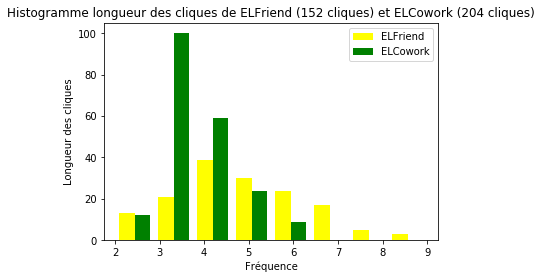

In [97]:
plt.hist([[len(i) for i in cliques_ELfriend],
          [len(i) for i in cliques_ELcowork]],
        bins = 8, color = ['yellow', 'green'],
        label = ['ELFriend', 'ELCowork'],
        histtype = 'bar')
plt.ylabel('Longueur des cliques')
plt.xlabel('Fréquence')
plt.title('Histogramme longueur des cliques de ELFriend '+
          '({len1} cliques) et ELCowork ({len2} cliques)'.format(len1 = len(cliques_ELfriend),
                                                                 len2 = len(cliques_ELcowork)
                                                                )
         )
plt.legend()

## 2.2 Diamètre


_Def_ : Le **diamètre** d'un graphe est la plus grande distance possible qui puisse exister entre deux de ses sommets ; la **distance** entre deux sommets étant définie par la longueur d'un plus court chemin entre ces deux sommets.

Le diamètre est légèrement plus grand pour ELFriend que pour ELcowork.

In [136]:
print(nx.info(ELfriendGUG))

Name: ELfriend
Type: Graph
Number of nodes: 69
Number of edges: 399
Average degree:  11.5652


In [84]:
print("Diamètre ELfriendGUG =",nx.diameter(ELfriendGUG))
print("Diamètre ELcowork =",nx.diameter(ELcowork_ni))

Diamètre ELfriendGUG = 5
Diamètre ELcowork = 4


La **densité** est le ratio entre le nombre de liens existants et le nombre de liens possibles
$$
Density=\begin{cases}
\frac{L}{n(n-1)} & \text{ pour graphes orientés} \\
\frac{L}{\frac{(n-1)}{2}} & \text{ pour graphes orientés} 
\end{cases}
$$

Le graph des relations amicales est plus dense, si on prend le réseau non orienté (mais ce n'est plus le cas si on prend le graph orienté), c'est cohérent avec les précédents résultats


In [81]:
print(nx.density(ELfriendGUG))
print(nx.density(ELcowork))
print(nx.density(ELfriendG))

0.170076726342711
0.15211267605633802
0.11569416498993963


L'A.P.L est d'un peu plus de 2 pour les deux graphs et légèrement plus petit pour ELCowork: dans ELcowork les relations sont en moyennes plus "directes" que pour ELfriend (il faut moins de liens pour mettre en relation deux noeuds)

In [90]:
## average shortest path length
print(nx.average_shortest_path_length(ELfriendG_ni))
print(nx.average_shortest_path_length(ELcowork_ni))

2.29156010230179
2.10351966873706


Reciprocité = $\frac{N\text{ arêtes réciproques}}{N\text{ arêtes}}$.

La réciprocité est uniquement intéressante pour un graph orienté, elle est de 0.6 pour ELfriend, ce qui est assez élevé (moins de 40% de liens sont non-réciproques).

In [145]:
##### Reciprocity (only interesting in digraph; not relevant in undirected graphs)
print(nx.reciprocity(ELfriendG)) # assez élevé

0.6121739130434782


Le *global clustering coefficient* (ou *transitivity*) est au rapport entre le nombre de triades transitives (*triangles*) et le nombre de triades possiblement transitives (*triads*) : 
$$
T = \frac{\#triangles}{\#triads}
$$
Il est de 0,31 pour ELcowork et 0,35 pour ELFriend : il y a donc en proportion plus de triades transitives dans le réseaux d'amitiés (ce qui semble cohérent avec les précédentes statistiques).

Pour chaque noeud $i$, le *local clustering coefficient* est égal à
$$
CI_i=\frac{\text{nombre d'arêtes entre les amis de $i$}}{\text{nombre d'arêtes possibles entre les amis de $i$}}
$$
On peut également calculer la moyenne sur l'ensemble des noeuds : cette moyenne est proche de 0,4 pour les deux graphes.

In [123]:
##### Transitivity
print("Global clustering coefficient ELFriend:",
      nx.transitivity(ELfriendG)) # this is the global clustering coefficient
print("Global clustering coefficient ELcowork:",
      nx.transitivity(ELcowork),"\n") # this is the global clustering coefficient

# Clustering
print("Local clustering coefficient ELFriend:\n",
      trie_dict(nx.clustering(ELfriendG),nb_dec=3), sep="")  # measure is by node (local clustering coefficient)
print("Local clustering coefficient ELcowork:\n",
      trie_dict(nx.clustering(ELcowork),nb_dec=3),"\n", sep="")  # measure is by node (local clustering coefficient)

## take the average:
print("Average clustering coefficient ELFriend:",
      nx.average_clustering(ELfriendG)) 
print("Average clustering coefficient ELcowork:",
      nx.average_clustering(ELcowork)) 

Global clustering coefficient ELFriend: 0.3473431401981387
Global clustering coefficient ELcowork: 0.3069738480697385 

Local clustering coefficient ELFriend:
{1: 0.614, 2: 0.523, 3: 0.25, 4: 0.375, 5: 0.173, 6: 0, 7: 0.2, 8: 0.37, 9: 0.598, 10: 0.55, 11: 0.53, 12: 0.355, 13: 0.344, 14: 0.291, 15: 0.385, 16: 0.253, 17: 0.312, 18: 0.471, 19: 0.288, 20: 0.455, 21: 0.537, 22: 0.562, 23: 0.704, 24: 0.354, 25: 0.36, 26: 0.381, 27: 0.486, 28: 0.406, 29: 0.407, 30: 0.337, 31: 0.229, 32: 0.51, 33: 0.301, 34: 0.298, 35: 0.376, 36: 0.262, 37: 0, 38: 0.324, 39: 0.287, 40: 0.385, 41: 0.311, 42: 0.368, 43: 0.322, 44: 0, 45: 0.198, 46: 0.385, 47: 0, 48: 0.324, 49: 0.683, 50: 0.504, 51: 0.651, 52: 0.445, 53: 0, 54: 0.554, 55: 0.333, 56: 0.52, 57: 0.341, 58: 0.401, 59: 0.485, 60: 0.29, 61: 0.833, 62: 0.531, 63: 1.0, 64: 0.215, 65: 0.276, 66: 0.315, 67: 0.763, 68: 0.377, 69: 0.682, 70: 0.459, 71: 0.65}
Local clustering coefficient ELcowork:
{1: 0.167, 2: 0.378, 3: 0.667, 4: 0.324, 5: 0.385, 6: 0.348, 7

Pour savoir quel sommet est le plus important, on peut commencer par regarder le degré de centralité (*degree centrality*) qui mesure pour chaque individu le nombre d'arêtes entrantes et sortantes (indicateur normalisé en divisant par le nombre de liens possibles dans un graphe de taille $n-1$).
Pour ELCowork, l'individu qui maximise cette variable est le 22.

In [137]:
d_cen_ELcowork = nx.degree_centrality(ELcowork)
print(trie_dict(d_cen_ELcowork,nb_dec=3))
ind_max_d_cen = max(d_cen_ELcowork, key=d_cen_ELcowork.get)
print("L'individu qui maximise le degré de centralité dans ELcowork est le",ind_max_d_cen,
      "\nSes attributs sont :", ELcowork.nodes(data=True)[ind_max_d_cen])

{1: 0.057, 2: 0.143, 3: 0.043, 4: 0.243, 5: 0.2, 6: 0.171, 7: 0.043, 8: 0.0, 9: 0.071, 10: 0.114, 11: 0.157, 12: 0.186, 13: 0.214, 14: 0.114, 15: 0.271, 16: 0.357, 17: 0.314, 18: 0.186, 19: 0.286, 20: 0.071, 21: 0.1, 22: 0.4, 23: 0.114, 24: 0.257, 25: 0.114, 26: 0.386, 27: 0.157, 28: 0.286, 29: 0.243, 30: 0.129, 31: 0.271, 32: 0.257, 33: 0.129, 34: 0.114, 35: 0.157, 36: 0.129, 37: 0.057, 38: 0.186, 39: 0.157, 40: 0.186, 41: 0.229, 42: 0.114, 43: 0.2, 44: 0.071, 45: 0.143, 46: 0.129, 47: 0.057, 48: 0.114, 49: 0.171, 50: 0.1, 51: 0.143, 52: 0.1, 53: 0.071, 54: 0.157, 55: 0.186, 56: 0.1, 57: 0.114, 58: 0.143, 59: 0.114, 60: 0.1, 61: 0.129, 62: 0.143, 63: 0.171, 64: 0.071, 65: 0.157, 66: 0.129, 67: 0.057, 68: 0.086, 69: 0.057, 70: 0.114, 71: 0.057}
L'individu qui maximise le degré de centralité dans ELcowork est le 22 
Ses attributs sont : {'Status': 1, 'Gender': 1, 'Office': 1, 'Senior': 9, 'Age': 49, 'Spec': 1, 'School': 3}


Pour ELFriend les résultats sont différents : l'individu 22 ne semble pas central, c'est l'individu 26 qui maximise les degrés entrants (mais a un faible *out-degree*) et c'est l'individu qui maximise les degrés sortants.

In [139]:
################# Centrality
in_d_cen_ELfriend = nx.in_degree_centrality(ELfriendG)
out_d_cen_ELfriend = nx.out_degree_centrality(ELfriendG)
ind_max_in_d_cen = max(in_d_cen_ELfriend, key=in_d_cen_ELfriend.get)
ind_max_out_d_cen = max(out_d_cen_ELfriend, key=out_d_cen_ELfriend.get)

print("in_degree_centrality pour ELfriend")
print(trie_dict(in_d_cen_ELfriend,nb_dec=3))
print("L'individu qui maximise le in-degree de centralité dans ELfriend est le",ind_max_in_d_cen,
      "\nSes attributs sont :", ELfriendG.nodes(data=True)[ind_max_in_d_cen],"\n")
print("out_degree_centrality pour ELfriend")
print(trie_dict(out_d_cen_ELfriend,nb_dec=3))
print("L'individu qui maximise le out-degree de centralité dans ELfriend est le",ind_max_out_d_cen,
      "\nSes attributs sont :", ELfriendG.nodes(data=True)[ind_max_out_d_cen])

in_degree_centrality pour ELfriend
{1: 0.071, 2: 0.143, 3: 0.057, 4: 0.2, 5: 0.071, 6: 0.029, 7: 0.029, 8: 0.1, 9: 0.2, 10: 0.057, 11: 0.2, 12: 0.114, 13: 0.286, 14: 0.086, 15: 0.029, 16: 0.143, 17: 0.257, 18: 0.071, 19: 0.057, 20: 0.1, 21: 0.214, 22: 0.086, 23: 0.1, 24: 0.243, 25: 0.143, 26: 0.314, 27: 0.243, 28: 0.129, 29: 0.143, 30: 0.071, 31: 0.214, 32: 0.1, 33: 0.043, 34: 0.157, 35: 0.143, 36: 0.157, 37: 0.014, 38: 0.186, 39: 0.186, 40: 0.114, 41: 0.243, 42: 0.129, 43: 0.186, 44: 0.0, 45: 0.057, 46: 0.071, 47: 0.0, 48: 0.057, 49: 0.086, 50: 0.114, 51: 0.1, 52: 0.2, 53: 0.0, 54: 0.157, 55: 0.043, 56: 0.143, 57: 0.171, 58: 0.171, 59: 0.057, 60: 0.114, 61: 0.043, 62: 0.071, 63: 0.0, 64: 0.214, 65: 0.114, 66: 0.043, 67: 0.043, 68: 0.071, 69: 0.057, 70: 0.071, 71: 0.086}
L'individu qui maximise le in-degree de centralité dans ELfriend est le 26 
Ses attributs sont : {'Status': 1, 'Gender': 1, 'Office': 1, 'Senior': 15, 'Age': 41, 'Spec': 1, 'School': 3} 

out_degree_centrality pour ELf

La *betweenness centrality* permet d'identifier les *gatekeepers* : les individus qui ont le plus de chemins qui passent par eux. Pour le réseau d'amitiés c'est l'individu 64 qui maximise cet indicateur avec des caractéristiques relativement différentes des précédents individus : une femme agée de 45 ans, associée, qui travaille depuis 2 ans dans l'entreprise.
Pour le réseau Elcowork c'est encore l'individu 22. De manière générale, ce ne sont pas les individus qui ont le plus d'ancienneté dans l'entreprise qui occupe une place centrale dans ce réseau.

In [144]:
# Betweenness centrality
b_c_Elfriend = nx.betweenness_centrality(ELfriendG)
b_c_Elcowork = nx.betweenness_centrality(ELcowork)
ind_max_b_c_friend = max(b_c_Elfriend, key=b_c_Elfriend.get)
ind_max_b_c_cowork = max(b_c_Elcowork, key=b_c_Elcowork.get)

print("Betweeness centrality pour ELfriend :",
      trie_dict(b_c_Elfriend,nb_dec=3), sep="\n")
print("L'individu qui maximise la betweeness centrality dans ELfriend est le",ind_max_b_c_friend,
      "\nSes attributs sont :", ELfriendG.nodes(data=True)[ind_max_b_c_friend],"\n")
print("\nBetweeness centrality pour ELcowork :",
      trie_dict(b_c_Elcowork,nb_dec=3), sep="\n")
print("L'individu qui maximise la betweeness centrality dans ELcowork est le",ind_max_b_c_cowork,
      "\nSes attributs sont :", ELcowork.nodes(data=True)[ind_max_b_c_cowork],"\n")

# Betweenness values are normalized by 2/((n-1)(n-2)) for graphs,
# and 1/((n-1)(n-2)) for directed graphs, where n is the number of nodes 

Betweeness centrality pour ELfriend :
{1: 0.001, 2: 0.003, 3: 0.0, 4: 0.038, 5: 0.022, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.016, 10: 0.001, 11: 0.016, 12: 0.036, 13: 0.046, 14: 0.018, 15: 0.013, 16: 0.025, 17: 0.08, 18: 0.022, 19: 0.011, 20: 0.013, 21: 0.013, 22: 0.008, 23: 0.0, 24: 0.076, 25: 0.029, 26: 0.018, 27: 0.017, 28: 0.02, 29: 0.015, 30: 0.007, 31: 0.104, 32: 0.006, 33: 0.012, 34: 0.016, 35: 0.021, 36: 0.013, 37: 0.0, 38: 0.015, 39: 0.023, 40: 0.007, 41: 0.053, 42: 0.033, 43: 0.053, 44: 0.0, 45: 0.006, 46: 0.003, 47: 0.0, 48: 0.009, 49: 0.001, 50: 0.011, 51: 0.004, 52: 0.03, 53: 0.0, 54: 0.009, 55: 0.0, 56: 0.011, 57: 0.03, 58: 0.043, 59: 0.004, 60: 0.019, 61: 0.0, 62: 0.003, 63: 0.0, 64: 0.135, 65: 0.046, 66: 0.025, 67: 0.0, 68: 0.009, 69: 0.007, 70: 0.012, 71: 0.002}
L'individu qui maximise la betweeness centrality dans ELfriend est le 64 
Ses attributs sont : {'Status': 2, 'Gender': 2, 'Office': 1, 'Senior': 2, 'Age': 45, 'Spec': 2, 'School': 2} 


Betweeness centrality pour ELcowo

In [120]:
# Eigenvector centrality
print(trie_dict(nx.eigenvector_centrality(ELfriendG)))
# This measure works only with undirected graphs.
# For directed graphs, networkx takes the “left” eigenvector centrality
# which corresponds to the in-edges in the graph.
# For out-edges eigenvector centrality first reverse the graph with G.reverse()
# (it is the transpose of the adjacency matrix)

# Closeness centrality
print(trie_dict(nx.closeness_centrality(ELfriendG)))
# The closeness centrality uses inward distance to a node, not outward.
# If you want to use outword distances apply the function to G.reverse()

{1: 0.08439388052124298, 2: 0.14254119253545663, 3: 0.03202925607452818, 4: 0.22458101420356028, 5: 0.02773078246837298, 6: 0.008834639704974582, 7: 0.0035598808937105124, 8: 0.09254665381403404, 9: 0.26019076629678245, 10: 0.0710382823473247, 11: 0.23978515507807274, 12: 0.12211926179380513, 13: 0.26378380973201915, 14: 0.07315092684915626, 15: 0.021700993781826276, 16: 0.11036253679727454, 17: 0.25506940276531814, 18: 0.0214927440090231, 19: 0.039557806898964695, 20: 0.13949993471901279, 21: 0.2613765533522788, 22: 0.09745777475110073, 23: 0.15282638282003977, 24: 0.260191209124568, 25: 0.08824099991635224, 26: 0.3018221960535731, 27: 0.28342457915399216, 28: 0.0418337404668397, 29: 0.12364875805810151, 30: 0.029791533404236546, 31: 0.08997595228557402, 32: 0.03510922120869662, 33: 0.010405458004361982, 34: 0.11607939230004265, 35: 0.03504372523037884, 36: 0.1116476251507282, 37: 0.0020256677206830233, 38: 0.16874104118987474, 39: 0.1276364908246847, 40: 0.1260904616166962, 41: 0.182

In [ ]:
def graphiques(data, focus_node = 1):
    if type(data).__name__=="DiGraph":
        neighbours = list(data.predecessors(focus_node)) + list(data.successors(focus_node))
    else:
        neighbours = list(data.neighbors(focus_node))
    # On va mettre en évidence les voisins de focus_node (=1)
    node_col = []
    for node in data:
        if node == focus_node:
            node_col.append('red') # 1 en rouge
        elif node in neighbours: 
            node_col.append('orange') # voisins en orange
        else:
            node_col.append('green') # autres en vert
    edge_col = []
    for x,y in data.edges():
        if (x == focus_node)|(y==focus_node):
            edge_col.append('blue') # on met en bleu les arêtes voisins de focus_node
        else: 
            edge_col.append('black') 
    # Pour le draw_shell on veut que le cercle soit ordonné (que les numéros se suivent) :
    pos_shell = nx.shell_layout(data)
    #pos_shell = {sorted(pos_shell.keys())[i]:list(pos_shell.values())[i] for i in range(0,len(pos_shell))}
    pos_shell = {sorted(pos_shell.keys())[i]:global_shell_layout[sorted(pos_shell.keys())[i]-1] for i in range(0,len(pos_shell))}
    
    nx.draw(data, with_labels = True, node_color=node_col, edge_color=edge_col)
    plt.show()
    nx.draw_kamada_kawai(data, with_labels = True, node_color=node_col, edge_color=edge_col)
    plt.show()
    nx.draw(data, with_labels = True, node_color=node_col, edge_color=edge_col, pos = pos_shell)
    plt.show()

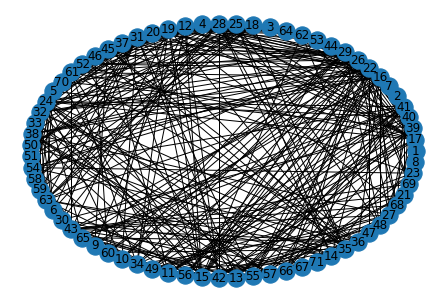

In [53]:
nx.draw_shell(ELcowork,with_labels = True) #regarder seed graphiques Kim

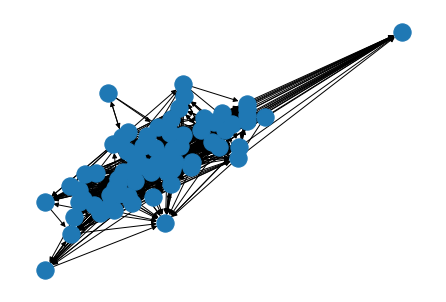

In [23]:
#### Let us look at visualization

# draw graph
nx.draw(ELfriendG)
plt.show()

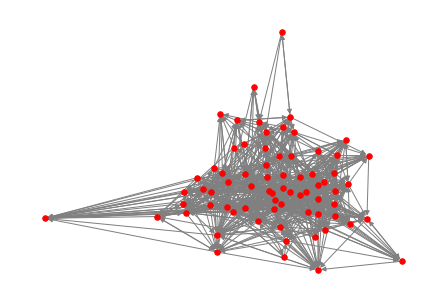

In [24]:
# improve visualization

# change layout, eg Fruchterman Reingold
# reduce node size, make edges more transparent to improve visibility
nx.draw(ELfriendG, with_labels=False, node_size=30, node_color="red", edge_color = "gray",
        pos=nx.fruchterman_reingold_layout(ELfriendG))

# autres layouts to try: spring_layout, spectral_layout, random_layout, circular_layout... 


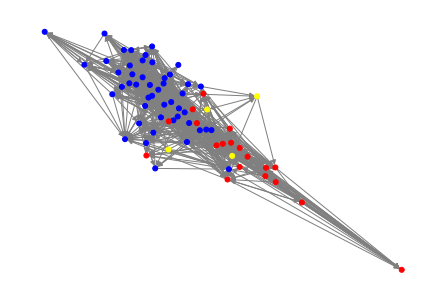

In [25]:
### use different colors to represent attributes, eg Office
# Office has 3 values only (categorical variable)

# create empty list for node colors
node_color = []

# for each node in the graph
for node in ELfriendG.nodes(data=True):

    # if the node has the attribute Office 1
    if node[1]['Office']==1:
        node_color.append('blue')
        
    # if the node has the attribute Office 2
    elif node[1]['Office']==2:
        node_color.append('red')

    # if the node has the attribute office 3
    elif node[1]['Office']==3:
        node_color.append('yellow')

    # draw graph with node attribute color
nx.draw(ELfriendG, with_labels=False, node_size=25, node_color=node_color, edge_color = "gray")


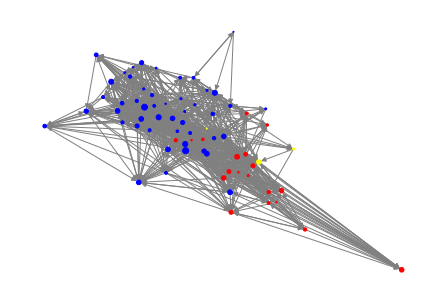

In [26]:
# change node size to reflect indegree

indeg = ELfriendG.in_degree   # sets up the indegree view
indegs = [d for n, d in indeg]   # gets all nodes' degree values

# draw plot (color = office)
nx.draw(ELfriendG, pos=nx.fruchterman_reingold_layout(ELfriendG), with_labels=False,
        node_color=node_color, edge_color = "gray", 
        node_size=indegs)
plt.show()

# Exercise: do the same for outdegree